In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from math import ceil,floor
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
filepath="data\\extracted_images\\"
datapath="data\\data.txt"
datafile=open(datapath,"w")
label=["10","11","12","13"]
filename=["+","-","X","y"]

for i,l in zip(filename,label):
    imgPath=filepath+str(i)+"\\"
    imgDir=os.listdir(imgPath)
    for j in range(6000):
        imgName=imgDir[j]
        img=cv2.imread(imgPath+imgName)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        _,binary=cv2.threshold(gray,127,1,0)
        binary=binary.astype(str).flatten()
        
        datafile.write(l+" ")
        for xi in binary:
            datafile.write(xi)
        datafile.write("\n")
        
datafile.close()

In [ ]:
def resize_pm(img):
    
    img=img.astype("uint8")
    img=cv2.resize(img,(26,26))
    _,binary=cv2.threshold(img,254,255,0)
        
    plt.imshow(binary)
    
    binary=padding(binary)
    
    return binary

In [ ]:
def padding(img):
    
    return np.hstack((np.ones((28,1))*255,np.vstack((np.ones((1,26))*255,img,np.ones((1,26))*255)),np.ones((28,1))*255))

In [ ]:
datapath="data\\data.txt"
with open(datapath,"r") as file:
    data=np.array([text.split() for text in file.readlines()])  
    X_pm=np.array([list(x) for x in data[:,1]]).astype(int)
    Y_pm=data[:,0].astype(int)

In [ ]:
# if i achive 23999 and not stop, please stop it by key directly
X_pmr=np.ones((24000,28,28))
for i in range(0,24000):
    print("i:{}".format(i))
    ima=X_pm[i].reshape((45,45))*255
    
    X_pmr[i]=resize_pm(ima)

In [ ]:
X_pmr=X_pmr[:24000]

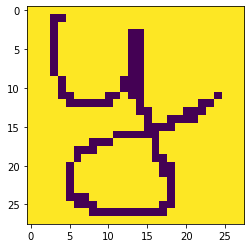

In [ ]:
plt.imshow(X_pmr[21000].reshape((28,28)))

In [ ]:
#this code is refer from https://www.jianshu.com/p/84f72791806f
"""
@author: monitor1379 
@contact: yy4f5da2@hotmail.com
@site: www.monitor1379.com
"""

import struct

train_images_idx3_ubyte_file = 'data\\train-images.idx3-ubyte'
train_labels_idx1_ubyte_file = 'data\\train-labels.idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):

    bin_data = open(idx3_ubyte_file, 'rb').read()
  
    offset = 0
    fmt_header = '>iiii'
    _, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print('image amount: %d, size: %d*%d' % (num_images, num_rows, num_cols))

    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images
    
def decode_idx1_ubyte(idx1_ubyte_file):
   
    bin_data = open(idx1_ubyte_file, 'rb').read()

    offset = 0
    fmt_header = '>ii'
    _, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print('image amount: %d' % (num_images))

    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


train_images = decode_idx3_ubyte(train_images_idx3_ubyte_file)
train_labels = decode_idx1_ubyte(train_labels_idx1_ubyte_file)

In [ ]:
def transform(imgs):
    print(imgs.shape)
    for i in range(60000):
        print(i)
        
        _,binary=cv2.threshold(imgs[i],127,1,1)
        imgs[i]=binary
        
    return imgs

In [ ]:
XN=transform(train_images)
YN=train_labels

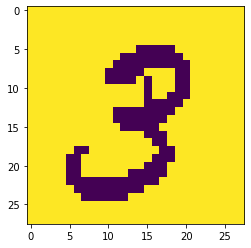

In [ ]:
plt.imshow(XN[5001])

In [ ]:
X=np.vstack((XN,X_pmr))
Y=np.hstack((YN,Y_pm))

In [ ]:
np.unique(Y,return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 6000,
        6000, 6000, 6000], dtype=int64))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,random_state=200)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout
from tensorflow.keras.utils import to_categorical,normalize
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import SGD

X_train_n=normalize(X_train,axis=1)
X_test_n=normalize(X_test,axis=1)

model=Sequential([
    Conv2D(32,5,input_shape=(28,28,1),use_bias=False),
    Conv2D(32,5,use_bias=False),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Conv2D(64,3,use_bias=False),
    Conv2D(64,3,use_bias=False),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(30,activation="relu"),
    Dense(30,activation="relu"),
    Dense(14,activation="softmax"),
])

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train_n,to_categorical(y_train),epochs=30)

In [ ]:
model.evaluate(X_test,to_categorical(y_test))

657/657 [==============================] - 16s 22ms/step - loss: 9.8244 - accuracy: 0.9813


[9.824403762817383, 0.9812856912612915]

In [ ]:
from image import getImage
Img=getImage()
Img.readImage("C:\\Users\\user\\Downloads\\xy.jpg")
Img.detectGrp(area_thre=0,percent_thre=1)
Img.grpImage()
Img.rough(thickness=10)
print(Img.returnImg()[0].shape)
Img.resize(size=20)
Img.padding(size=20)
imgList=Img.returnImg()
trydata=[]
for img in imgList:
    rel,binary=cv2.threshold(img,1,1,0)
    trydata.append(binary)
trydata=np.array(trydata)

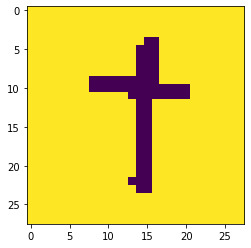

In [ ]:
plt.imshow(trydata[1])

In [ ]:
tt=normalize(trydata)

In [ ]:
predict=model.predict(trydata)
np.argmax(predict,axis=1)

array([12,  1, 13], dtype=int64)

In [ ]:
np.argsort(predict,axis=1)

array([[ 0,  9,  7,  4, 11,  6,  3,  1,  8,  5, 10,  2, 13, 12],
       [ 0,  4,  6,  9, 11, 12, 13,  8,  2,  5, 10,  3,  7,  1],
       [11,  1,  3, 12,  6,  0,  2,  9,  4, 10,  8,  7,  5, 13]],
      dtype=int64)

In [ ]:
model.save("CNNxy2")

INFO:tensorflow:Assets written to: CNNxy2\assets
